In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_5/advertising.csv')

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

Drop the text columns as it will not help us

In [4]:
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


Train/Test split and scaling data

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop('Clicked on Ad',axis=1)
y = df['Clicked on Ad']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let us use standard scaler

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

** Train and fit a KNN model on the scaled training set.**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [13]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predictions and Evaluations
** Now predict values for the testing data.**

In [14]:
y_pred = knn_model.predict(scaled_X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
accuracy_score(y_test, y_pred)

0.94

In [17]:
confusion_matrix(y_test, y_pred)

array([[137,   9],
       [  9, 145]])

** Create a classification report for the model.**

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.94      0.94      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Test for best K value to see if any improvement can be gotten

In [19]:
test_error_rates = []

for k in range(1,30):
  # test different K to find the best accuracy score
  knn_model_test = KNeighborsClassifier(n_neighbors = k)
  knn_model_test.fit(scaled_X_train, y_train)

  y_pred = knn_model_test.predict(scaled_X_test)
  test_error = 1 - accuracy_score(y_test, y_pred)
  test_error_rates.append(test_error)



Text(0.5, 0, 'k value')

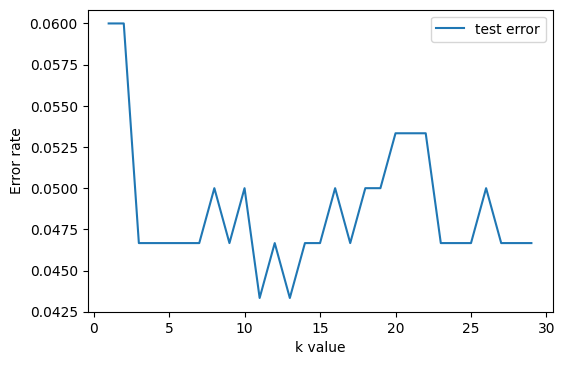

In [20]:
plt.figure(dpi=100)
plt.plot(range(1,30), test_error_rates,label = 'test error')
plt.legend()
plt.ylabel('Error rate')
plt.xlabel('k value')

### New Section

Rerun with K=14 and check results

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_model14 = KNeighborsClassifier(n_neighbors=14)

In [22]:
knn_model14.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [23]:
y_pred14 = knn_model14.predict(scaled_X_test)

In [24]:
accuracy_score(y_test,y_pred14)

0.9533333333333334

In [25]:
confusion_matrix(y_test, y_pred14)

array([[144,   2],
       [ 12, 142]])

In [26]:
print(classification_report(y_test, y_pred14))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.99      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [27]:
single_sample = X_test.iloc[42]

In [28]:
single_sample

Daily Time Spent on Site       75.55
Age                            22.00
Area Income                 41851.38
Daily Internet Usage          169.40
Name: 312, dtype: float64

In [29]:
knn_model14.predict(single_sample.values.reshape(1,-1))

array([0])

In [30]:
y_test.iloc[42]

1